In [2]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [3]:
import math
import numpy as np
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar
from matplotlib import pyplot

In [6]:
f = np.asarray([1,10,100,1000])

def objective(args): # Extend any function with extend to n variables 
    argsquare = np.multiply(args,args)
    return np.dot(argsquare, f)
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# gradient descent algorithm with nesterov momentum
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, epsilon):
    # track all solutions
    solutions = list()
    # generate an initial point
    x = np.ones(len(f))
    solutions.append(x)
    
    errors = []
    norm = []
    L = 2*np.max(f)
    mu = 2*np.min(f)
    k = mu/L
    # list of changes made to each variable
    y = x
    # run the gradient descent
    solution_eval = objective(x)
    while solution_eval >= epsilon:
        # calculate x (k+1), y (k+1)
        ygrad = derivative(y)
        x2 = y - (1/L)* ygrad
        y2 = x2 + (1 - np.sqrt(k))/(1 + np.sqrt(k))*(x2-x)
        x = x2
        y = y2  
        solution_eval = objective(x)
        solutions.append(x)
        # report progress
        print(x, solution_eval)
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(x)
        norm.append(solutionlength)
    return solutions, errors, norm
 



In [12]:
epsilon = 10**(-9)

In [13]:
solutionsnesterov = nesterov(objective, derivative, epsilon)

[0.999 0.99  0.9   0.   ] 91.799001
[0.99706325 0.97080694 0.72551762 0.        ] 63.0563775392705
[0.99424998 0.94326264 0.50555898 0.        ] 35.44496543846657
[0.99061758 0.90823292 0.26917679 0.        ] 16.47580785011413
[0.98622067 0.86659726 0.0425578  0.        ] 8.663655902221683
[ 0.98111122  0.81923901 -0.1531511   0.        ] 10.019630720112973
[ 0.9753387   0.7670363  -0.30317553  0.        ] 16.02627286507434
[ 0.96895015  0.71085364 -0.3996022   0.        ] 21.96018477818489
[ 0.96199031  0.6515342  -0.44110552  0.        ] 24.62780123139895
[ 0.95450171  0.58989294 -0.43205796  0.        ] 23.058218408745024
[ 0.94652473  0.52671041 -0.38120857  0.        ] 18.20214514059495
[ 0.93809776  0.46272738 -0.30012894  0.        ] 12.0289317938181
[ 0.92925723  0.39864028 -0.20161804  0.        ] 6.517643242226878
[ 0.92003773  0.33509734 -0.09823188  0.        ] 2.934322007321257
[ 0.91047207  0.27269552 -0.00106561  0.        ] 1.5727013923235698
[0.90059135 0.21197816 0.08

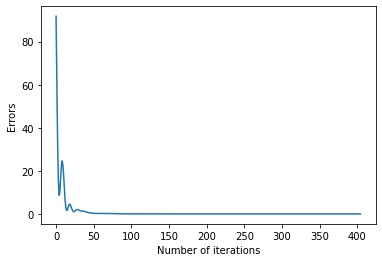

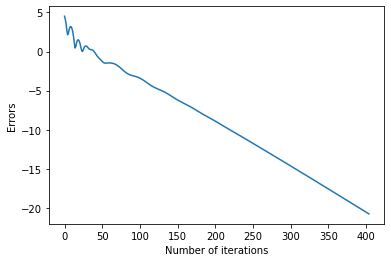

In [14]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
def plot_lnerrors_vs_num_iterations(errors):
    lnerrors = np.log(errors)
    plt.plot(lnerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsnesterov[1])
plot_lnerrors_vs_num_iterations(solutionsnesterov[1])

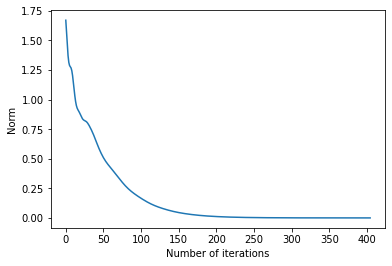

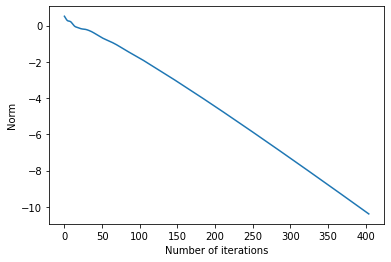

In [15]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lnnorm = np.log(norm)
    plt.plot(lnnorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsnesterov[2])
plot_lnnorm_vs_num_iterations(solutionsnesterov[2])